In [1]:
import pandas as pd #to reading data_set
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("C:\\Users\\ALTHOURAYA\\.anaconda\\AI-College-Project\\Data_preprocessing\\Final_Data.csv")

In [2]:
data.shape

(101766, 73)

In [3]:
data.head(5)

,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_emergency,...,d3_Circulatory,d3_Diabetes,d3_Digestive,d3_External_causes,d3_Genitourinary,d3_Injury,d3_Musculoskeletal,d3_Neoplasms,d3_Respiratory,d3_Supplementary_classification
0,0,1,0,4,1,16,41,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,2,3,6,59,0,18,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,2,2,6,11,5,13,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,2,2,6,44,1,16,0,...,1,0,0,0,0,0,0,0,0,0
4,1,1,0,2,1,6,51,0,8,0,...,0,1,0,0,0,0,0,0,0,0


In [5]:
for col in data.columns: # to know num of un values + print the largest five ones !
    print (col ,": " ,data[col].nunique())
    print(data[col].value_counts().nlargest(5))
    print('\n')

gender :  2
gender
0    54711
1    47055
Name: count, dtype: int64


admission_type_id :  5
admission_type_id
1    64386
0    18869
4    18480
3       21
2       10
Name: count, dtype: int64


discharge_disposition_id :  8
discharge_disposition_id
0    70031
2    13954
5    12902
3     2128
4     1184
Name: count, dtype: int64


admission_source_id :  8
admission_source_id
2    64588
4    29565
6     3187
7     2264
0     1104
Name: count, dtype: int64


time_in_hospital :  12
time_in_hospital
3    17756
2    17224
1    14208
4    13924
5     9966
Name: count, dtype: int64


medical_specialty :  29
medical_specialty
6     64584
1      7565
3      7440
0      5352
24     3099
Name: count, dtype: int64


num_lab_procedures :  96
num_lab_procedures
1     3208
43    2804
44    2496
45    2376
38    2213
Name: count, dtype: int64


num_procedures :  6
num_procedures
0    46652
1    20742
2    12717
3     9443
5     8032
Name: count, dtype: int64


num_medications :  35
num_medications
13   

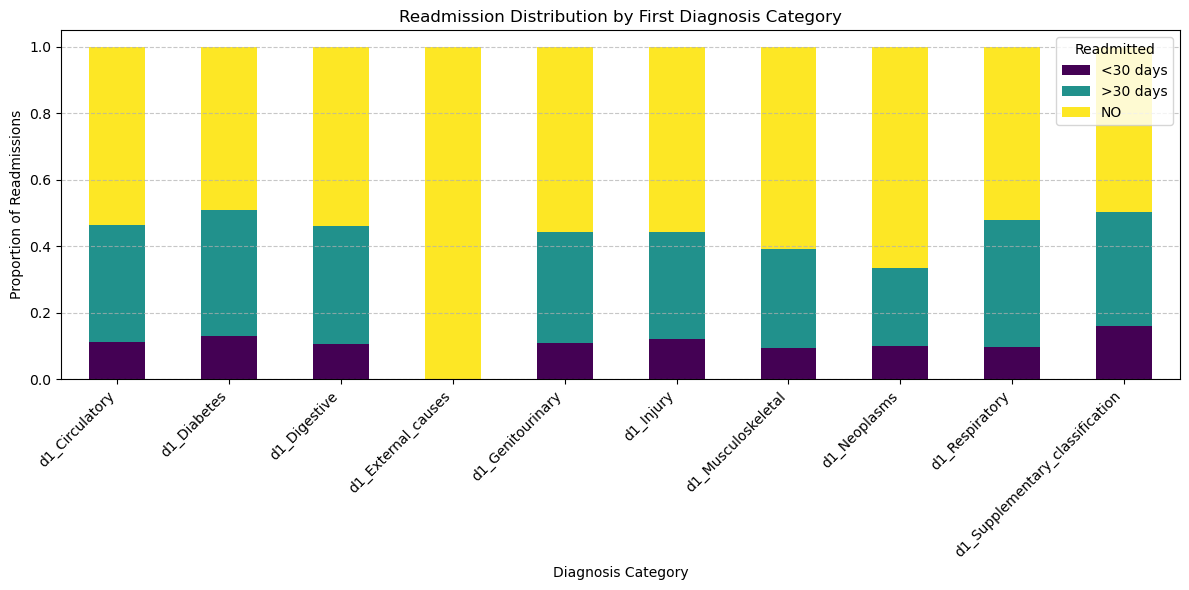

In [6]:

# Corrected diagnosis feature list based on your data
diag1_features = [
    'd1_Circulatory', 'd1_Diabetes', 'd1_Digestive', 'd1_External_causes',
    'd1_Genitourinary', 'd1_Injury', 'd1_Musculoskeletal',
    'd1_Neoplasms', 'd1_Respiratory', 'd1_Supplementary_classification'
]

# Prepare a DataFrame for plotting
plot_data = pd.DataFrame()

# Loop through each diagnosis feature
for feature in diag1_features:
    temp = data.groupby([feature, 'readmitted']).size().unstack(fill_value=0)
    temp = temp.div(temp.sum(axis=1), axis=0)  # Normalize to get % per category
    
    if 1 in temp.index:  # Ensure category "1" exists in the diagnosis column
        plot_data[feature] = temp.loc[1]
    else:
        plot_data[feature] = [0, 0, 0]  # Default if '1' row not found

# Transpose for plotting
plot_data = plot_data.T
plot_data.columns = ['<30 days', '>30 days', 'NO']  # 0, 1, 2 → mapped

# Plotting
plot_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Readmission Distribution by First Diagnosis Category")
plt.xlabel("Diagnosis Category")
plt.ylabel("Proportion of Readmissions")
plt.legend(title="Readmitted")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


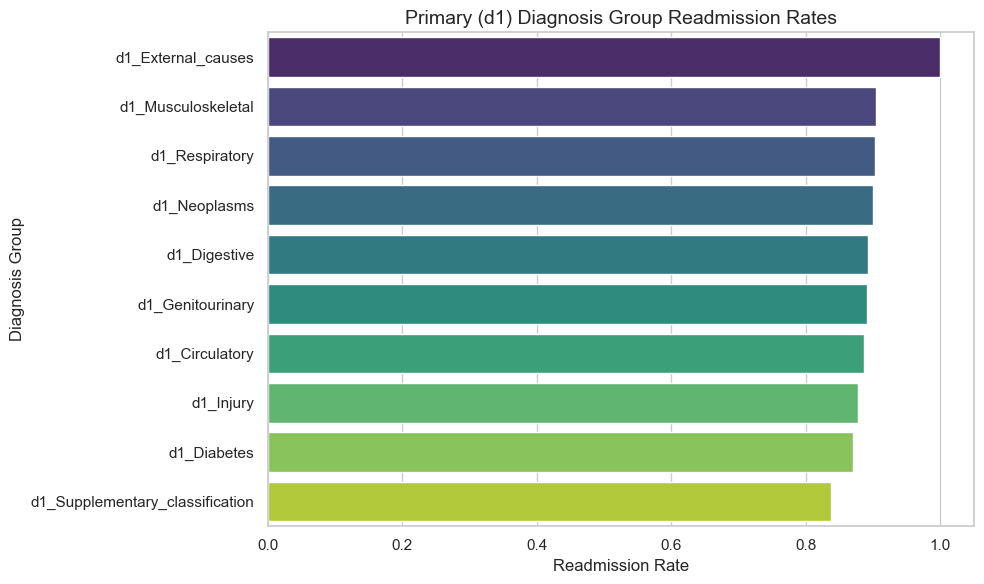

In [18]:

# Diagnosis columns
diag1_features = [
    'd1_Circulatory', 'd1_Diabetes', 'd1_Digestive', 'd1_External_causes',
    'd1_Genitourinary', 'd1_Injury', 'd1_Musculoskeletal',
    'd1_Neoplasms', 'd1_Respiratory', 'd1_Supplementary_classification'
]

# Compute readmission rate for each diagnosis group
readmission_rates = {}
for diag in diag1_features:
    has_diag = data[data[diag] == 1]
    if len(has_diag) > 0:
        rate = (has_diag['readmitted'] != 0).sum() / len(has_diag)
    else:
        rate = 0
    readmission_rates[diag] = rate

# Convert to DataFrame
rate_df = pd.DataFrame.from_dict(readmission_rates, orient='index', columns=['Readmission Rate'])
rate_df.sort_values('Readmission Rate', ascending=False, inplace=True)
rate_df.reset_index(inplace=True)
rate_df.rename(columns={'index': 'Diagnosis'}, inplace=True)
rate_df['Count'] = rate_df['Diagnosis'].map(lambda x: data[data[x] == 1].shape[0])
# Plot with seaborn (beautiful colors!)
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", len(rate_df))

sns.barplot(
    data=rate_df,
    y='Diagnosis',
    x='Readmission Rate',
    palette=palette
)

plt.title("Primary (d1) Diagnosis Group Readmission Rates", fontsize=14)
plt.xlabel("Readmission Rate")
plt.ylabel("Diagnosis Group")
plt.tight_layout()
plt.show()


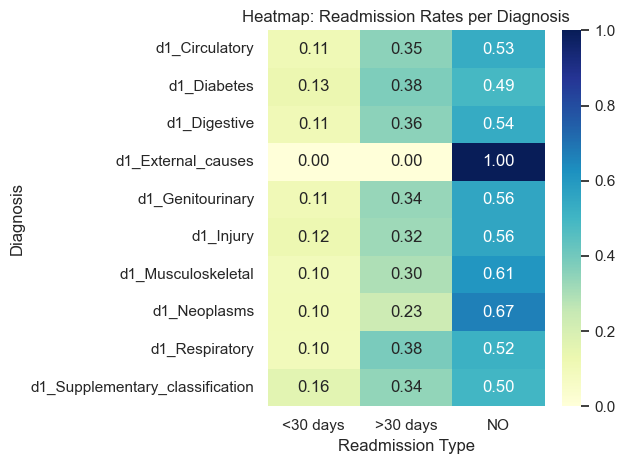

In [19]:

# Use the same `plot_data` after transposing
sns.heatmap(plot_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Heatmap: Readmission Rates per Diagnosis")
plt.xlabel("Readmission Type")
plt.ylabel("Diagnosis")
plt.tight_layout()

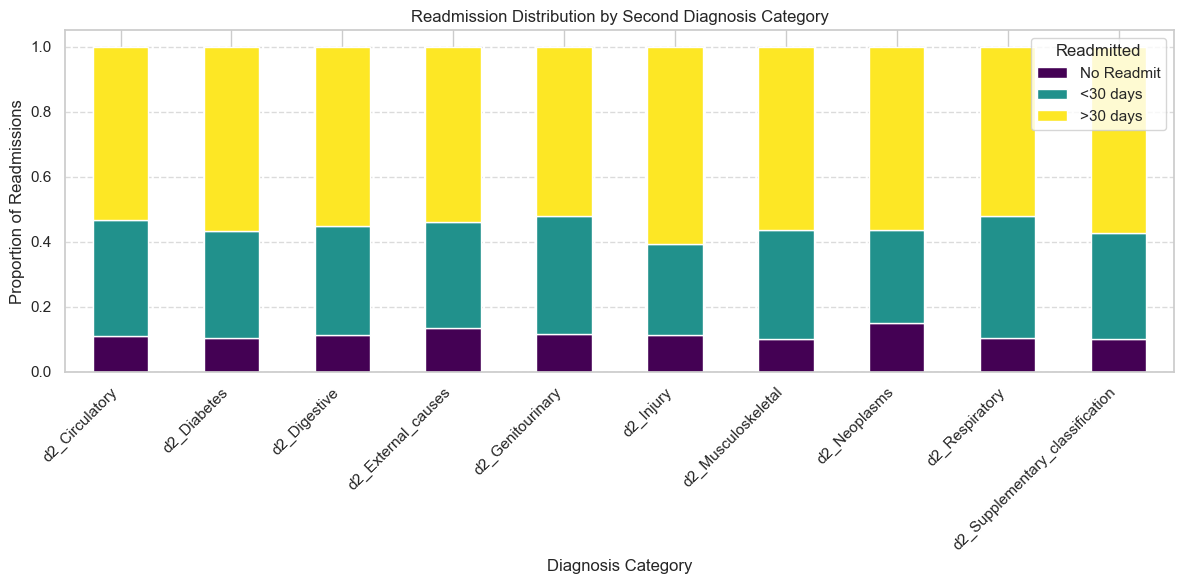

In [20]:
diag2_features = [
    'd2_Circulatory', 'd2_Diabetes', 'd2_Digestive', 'd2_External_causes',
    'd2_Genitourinary', 'd2_Injury', 'd2_Musculoskeletal',
    'd2_Neoplasms', 'd2_Respiratory', 'd2_Supplementary_classification'
]

plot_data_d2 = pd.DataFrame()

for feature in diag2_features:
    temp = data.groupby([feature, 'readmitted']).size().unstack(fill_value=0)
    temp = temp.div(temp.sum(axis=1), axis=0)
    if 1 in temp.index:
        plot_data_d2[feature] = temp.loc[1]
    else:
        plot_data_d2[feature] = [0, 0, 0]  # Default if no patients with diagnosis = 1

plot_data_d2 = plot_data_d2.T
plot_data_d2.columns = ['No Readmit', '<30 days', '>30 days']

plot_data_d2.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Readmission Distribution by Second Diagnosis Category")
plt.xlabel("Diagnosis Category")
plt.ylabel("Proportion of Readmissions")
plt.legend(title="Readmitted")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

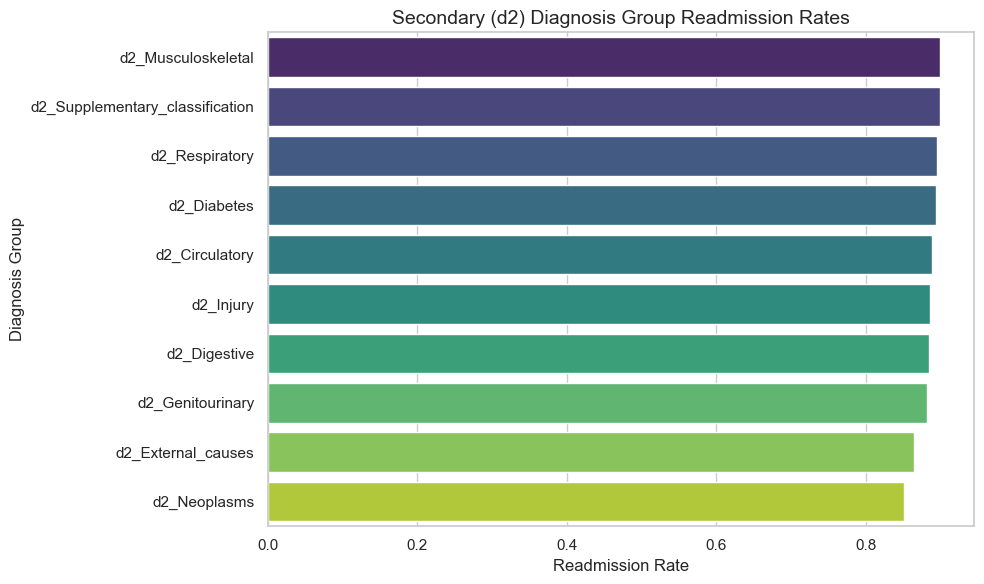

In [21]:
readmission_rates_d2 = {}
for diag in diag2_features:
    has_diag = data[data[diag] == 1]
    if len(has_diag) > 0:
        rate = (has_diag['readmitted'] != 0).sum() / len(has_diag)
    else:
        rate = 0
    readmission_rates_d2[diag] = rate

rate_df_d2 = pd.DataFrame.from_dict(readmission_rates_d2, orient='index', columns=['Readmission Rate'])
rate_df_d2.sort_values('Readmission Rate', ascending=False, inplace=True)
rate_df_d2.reset_index(inplace=True)
rate_df_d2.rename(columns={'index': 'Diagnosis'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", len(rate_df_d2))

barplot_d2 = sns.barplot(
    data=rate_df_d2,
    y='Diagnosis',
    x='Readmission Rate',
    palette=palette
)
barplot_d2.set_title("Secondary (d2) Diagnosis Group Readmission Rates", fontsize=14)
barplot_d2.set_xlabel("Readmission Rate")
barplot_d2.set_ylabel("Diagnosis Group")
plt.tight_layout()
plt.show()

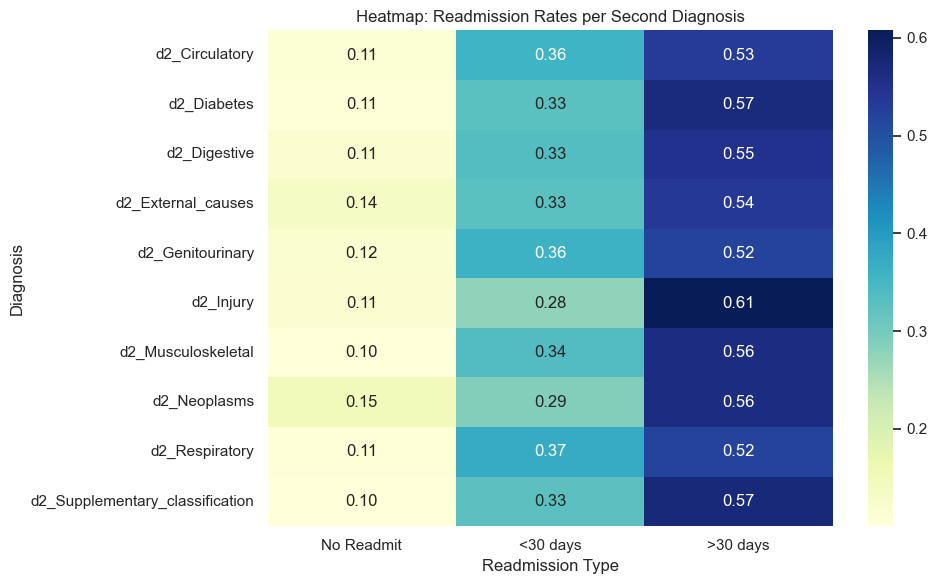

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(plot_data_d2, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Heatmap: Readmission Rates per Second Diagnosis")
plt.xlabel("Readmission Type")
plt.ylabel("Diagnosis")
plt.tight_layout()
plt.show()

In [24]:
diag3_features = [
    'd3_Circulatory', 'd3_Diabetes', 'd3_Digestive', 'd3_External_causes',
    'd3_Genitourinary', 'd3_Injury', 'd3_Musculoskeletal',
    'd3_Neoplasms', 'd3_Respiratory', 'd3_Supplementary_classification'
]

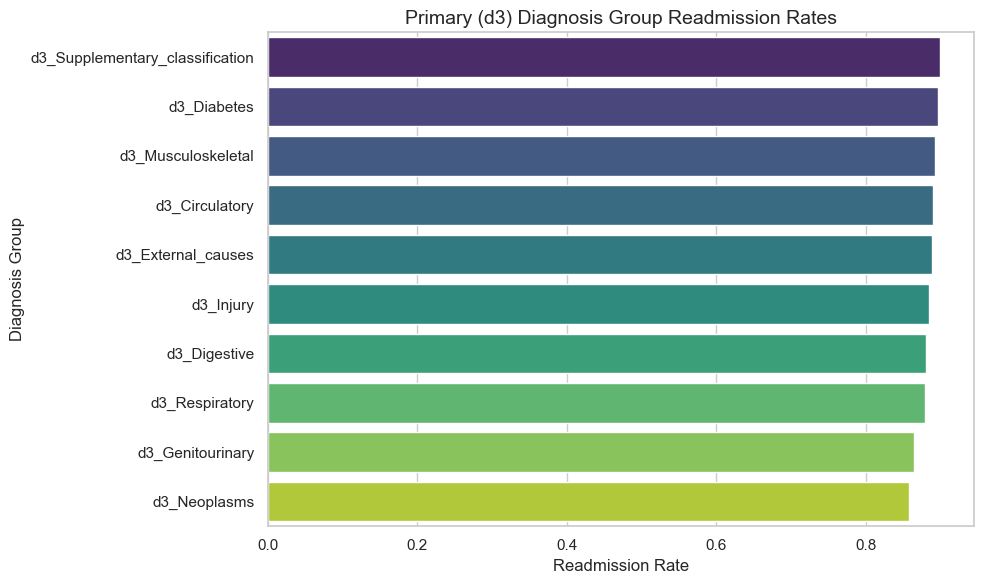

In [25]:

# Plot 1: Readmission Rate by Diagnosis Group
readmission_rates = {}
for diag in diag3_features:
    has_diag = data[data[diag] == 1]
    if len(has_diag) > 0:
        rate = (has_diag['readmitted'] != 0).sum() / len(has_diag)
    else:
        rate = 0
    readmission_rates[diag] = rate

rate_df = pd.DataFrame.from_dict(readmission_rates, orient='index', columns=['Readmission Rate'])
rate_df.sort_values('Readmission Rate', ascending=False, inplace=True)
rate_df.reset_index(inplace=True)
rate_df.rename(columns={'index': 'Diagnosis'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", len(rate_df))
sns.barplot(data=rate_df, y='Diagnosis', x='Readmission Rate', palette=palette)
plt.title("Primary (d3) Diagnosis Group Readmission Rates", fontsize=14)
plt.xlabel("Readmission Rate")
plt.ylabel("Diagnosis Group")
plt.tight_layout()
plt.show()

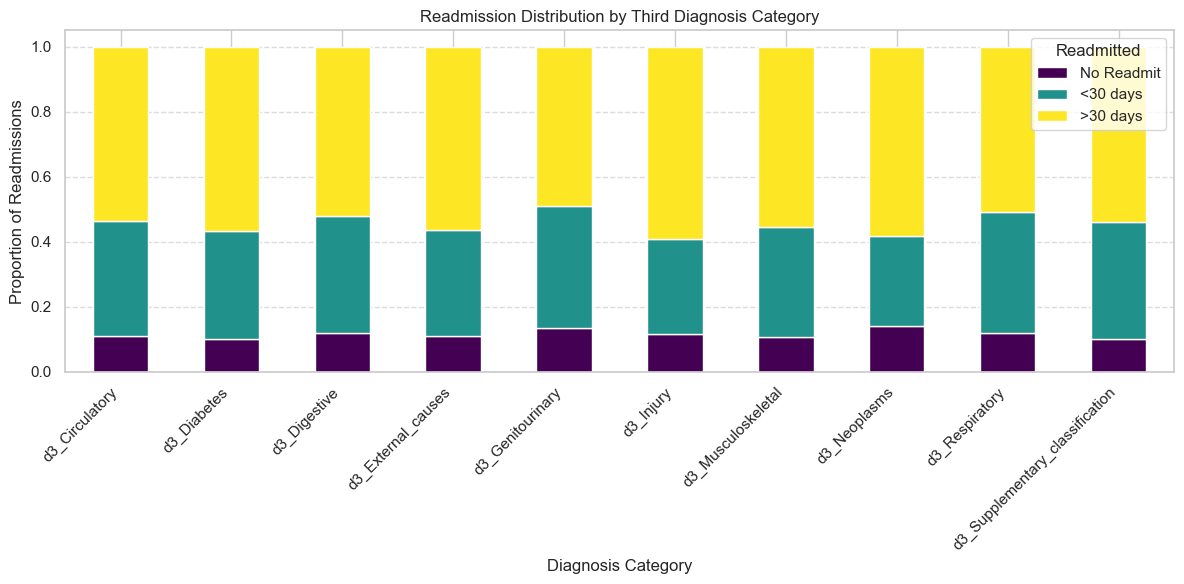

In [26]:
# Plot 2: Stacked Bar Plot of Readmission Distribution
plot_data = pd.DataFrame()
for feature in diag3_features:
    temp = data.groupby([feature, 'readmitted']).size().unstack(fill_value=0)
    temp = temp.div(temp.sum(axis=1), axis=0)  # Normalize
    if 1 in temp.index:
        plot_data[feature] = temp.loc[1]

plot_data = plot_data.T
plot_data.columns = ['No Readmit', '<30 days', '>30 days']
plot_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Readmission Distribution by Third Diagnosis Category")
plt.xlabel("Diagnosis Category")
plt.ylabel("Proportion of Readmissions")
plt.legend(title="Readmitted")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


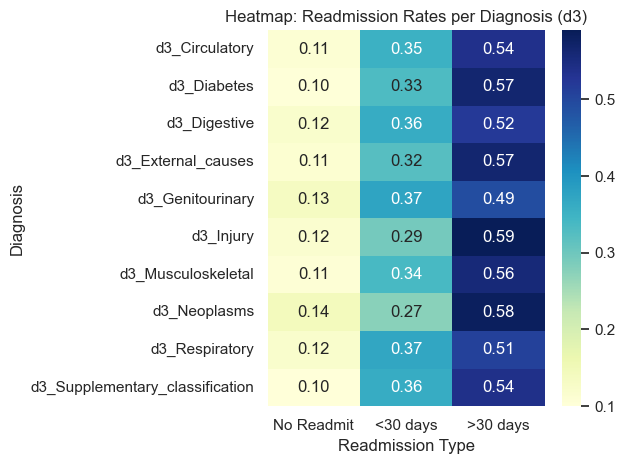

In [27]:
# Plot 3: Heatmap of Readmission Proportions
sns.heatmap(plot_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Heatmap: Readmission Rates per Diagnosis (d3)")
plt.xlabel("Readmission Type")
plt.ylabel("Diagnosis")
plt.tight_layout()
plt.show()

In [28]:
diag_features = [
    'd1_Circulatory', 'd1_Diabetes', 'd1_Digestive', 'd1_External_causes', 'd1_Genitourinary',
    'd1_Injury', 'd1_Musculoskeletal', 'd1_Neoplasms', 'd1_Respiratory', 'd1_Supplementary_classification',
    'd2_Circulatory', 'd2_Diabetes', 'd2_Digestive', 'd2_External_causes', 'd2_Genitourinary',
    'd2_Injury', 'd2_Musculoskeletal', 'd2_Neoplasms', 'd2_Respiratory', 'd2_Supplementary_classification',
    'd3_Circulatory', 'd3_Diabetes', 'd3_Digestive', 'd3_External_causes', 'd3_Genitourinary',
    'd3_Injury', 'd3_Musculoskeletal', 'd3_Neoplasms', 'd3_Respiratory', 'd3_Supplementary_classification'
]

In [29]:
# 2. Compute readmission rate difference (with vs without diagnosis)
rate_diff = {}

for diag in diag_features:
    has_diag = data[data[diag] == 1]
    no_diag = data[data[diag] == 0]
    
    if len(has_diag) == 0 or len(no_diag) == 0:
        continue

    rate_has = (has_diag['readmitted'] != 0).mean()
    rate_no = (no_diag['readmitted'] != 0).mean()
    diff = abs(rate_has - rate_no)
    
    rate_diff[diag] = diff

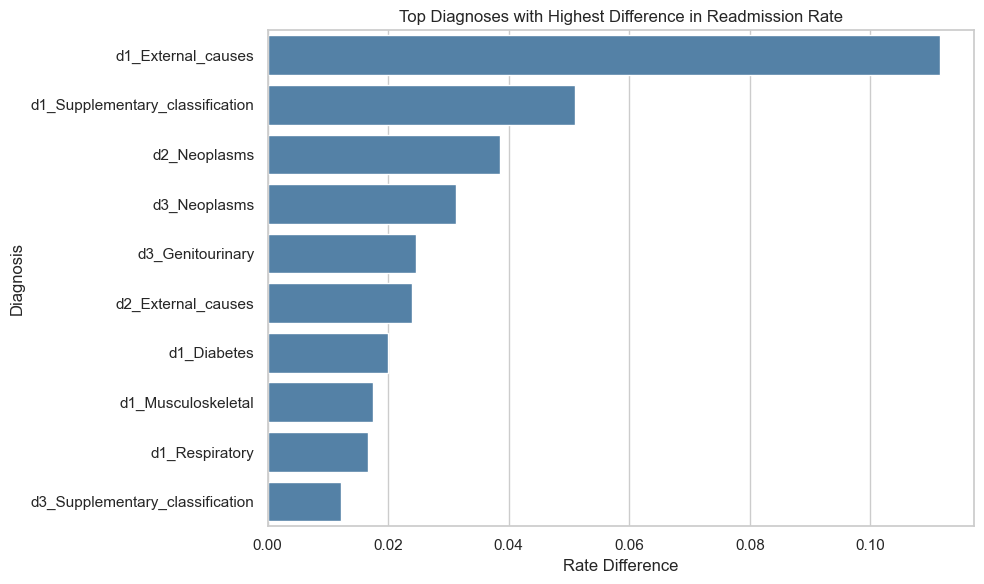

In [30]:
# 3. Create DataFrame & sort
diff_df = pd.DataFrame.from_dict(rate_diff, orient='index', columns=['Rate Difference'])
diff_df.sort_values(by='Rate Difference', ascending=False, inplace=True)

# 4. Top 10 differences
top_diff = diff_df.head(10).reset_index()
top_diff.rename(columns={'index': 'Diagnosis'}, inplace=True)

# 5. Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_diff, x='Rate Difference', y='Diagnosis', color='steelblue')
plt.title("Top Diagnoses with Highest Difference in Readmission Rate")
plt.tight_layout()
plt.show()